In [27]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Detect if probability shifts for attribute data (using Chi Square)
Use Chi Square test to compare number of 'a' in current vs. reference windows.
Tunable Parameters:
 a : Significant level (0.05 or 0.01) to reject the null hypothesis that current = reference
 w_size : Window size
 

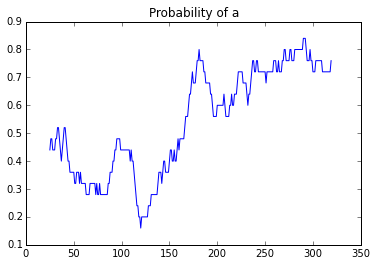

[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
[11, 14]
[9, 16]
0.420344935034
No change


In [47]:
#### Function to get detect concept change for attributes data
#### Assign char a,b,c to value 0,1,2 seperately for all data points first
## posTriple2_160,posTriple_175, posTripleDouble_175, negTriple,negWithRare,negBinary

# function to calculate probability from a data list
def findP(list):
    n = len(list)
    p_a = list.count(0) / n
    p_b = list.count(1) / n
    if p_a + p_b == 1:
        return p_a, p_b
    else:
        print('The data stream is not binary')
        return

# function to calculate probability from list with specific window size
def findP_window_size(list, pos, window_size):
    return findP(list[pos - size: pos])

# read data
with open('posBinary_150.txt') as f: # Open file as f
    lines = f.read().splitlines()  # Split file line by line and put lines in to var "lines"
f.close() # Close file

data = [] # Initiate an array "data" to hold original attributes data 
for x in lines:
    if x == 'a':    # Convert char a to number 0 and append to data array
        data.append(0) 
    if x == 'b':    # Convert char b to number 1 and append to data array
        data.append(1)
    if x == 'c':    # Convert char c to number 2 and append to data array
        data.append(2)
        
# print probability of a, b, c
# find probabilities
w_size = 25 # window size
num_choice = 2 # binary or multinomial
a = 0.05 # significant value

prob = []
x_axis = []
for i in range(len(data)):
    if i >= w_size:
        p = findP_window_size(data, i, w_size)
        prob.append(p[0])
        x_axis.append(i)

# plot probabilities        
plt.plot(x_axis, prob)
plt.title("Probability of a")
plt.show()
        

    
## WRITE LOOP    

W0 = data[:w_size] # set reference window
W1 = data[w_size: w_size * 2] # set current window
print(W0)
print(W1)

# find expected and observed value of a, b, c
if num_choice == 2:
    expected = [W0.count(0), W0.count(1)]
    observed = [W1.count(0), W1.count(1)]
if num_choice == 3:
    expected = [W0.count(0), W0.count(1), W0.count(2)]
    observed = [W1.count(0), W1.count(1), W0.count(2)]
    
# find chi square
chi = stats.chisquare(f_obs=observed, f_exp=expected)
p = chi[1]

print(expected)
print(observed)
print(p)

# reject H0 and conclude that there is a change at n
if p < a:
    print("Change detected at " + str(w_size * 2))
else:
    print("No change")

